<a href="https://colab.research.google.com/github/paulorobertolds/Bootcamp_corruption/blob/main/Copy_of_C%C3%B3pia_de_An%C3%A1lise_do_projeto_com_Voting_Gridsearch_Baysean_Over_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Função criada para trazer as métricas do Cross Validate

In [241]:
import pandas as pd
def printMetrics(modelo,X,y,cv=3):
  """
  recebe um modelo, X, y e cv
  returna um dataframe (tabela) com todas as métricas do cross_validate exceto fit_time e score_time
  """
  import numpy as np
  from sklearn.model_selection import cross_validate
  metrics = ['roc_auc','balanced_accuracy', 'average_precision', 'recall', 'accuracy', 'f1_macro','f1_weighted']
  cross = cross_validate(modelo, X, y, cv=cv, scoring=metrics)
  cv_scores = {k[5:]: np.mean(v) for k, v in cross.items() if k not in ['fit_time', 'score_time']}
  cv_scores=pd.DataFrame.from_dict(cv_scores,orient='index',columns=['Valor'])
  cv_scores.reset_index(inplace=True)
  cv_scores.columns=['Métrica','Valor']
  return cv_scores

#################################
# CONFIGURAÇÕES
#################################
pd.options.display.max_columns = 500

## **Carrega o dataset**

In [242]:
url = "https://raw.githubusercontent.com/paulorobertolds/Bootcamp_corruption/main/corruptiondata_aer.csv" 
df = pd.read_csv(url, sep=',', low_memory=False)


## **Análise Exploratória dos Dados (EDA)**

## Descrição das possíveis variáveis independentes


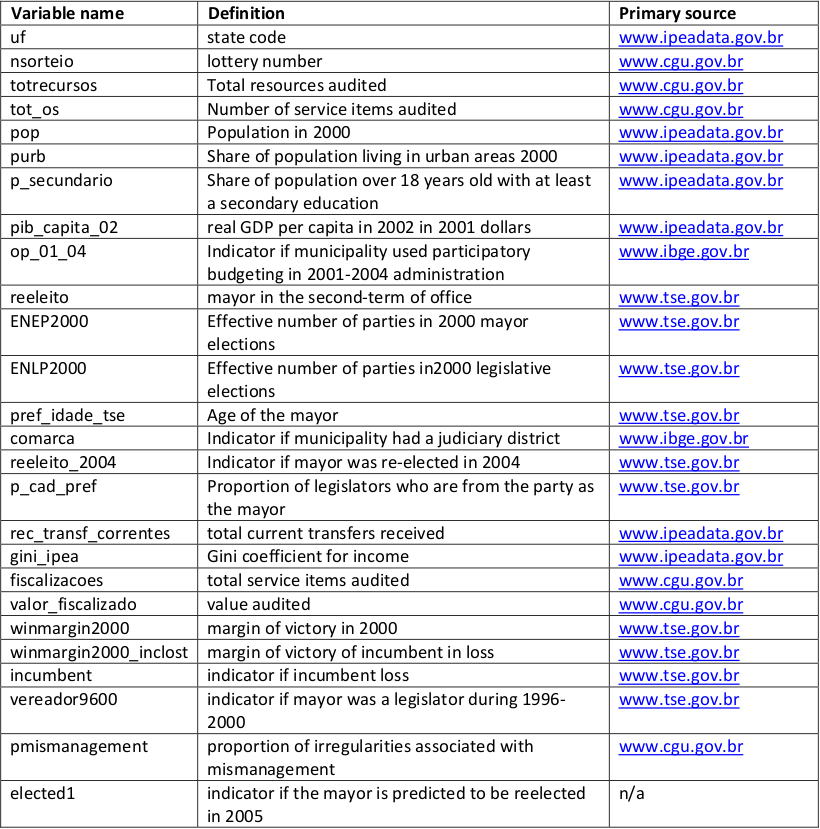

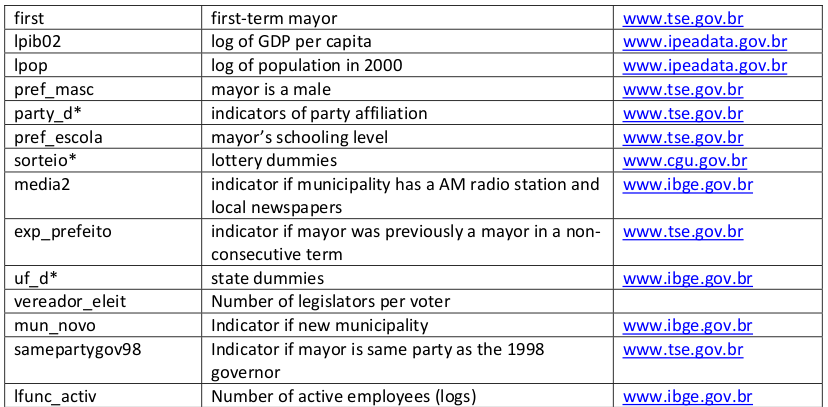

## Descrição das possíveis variáveis dependentes

: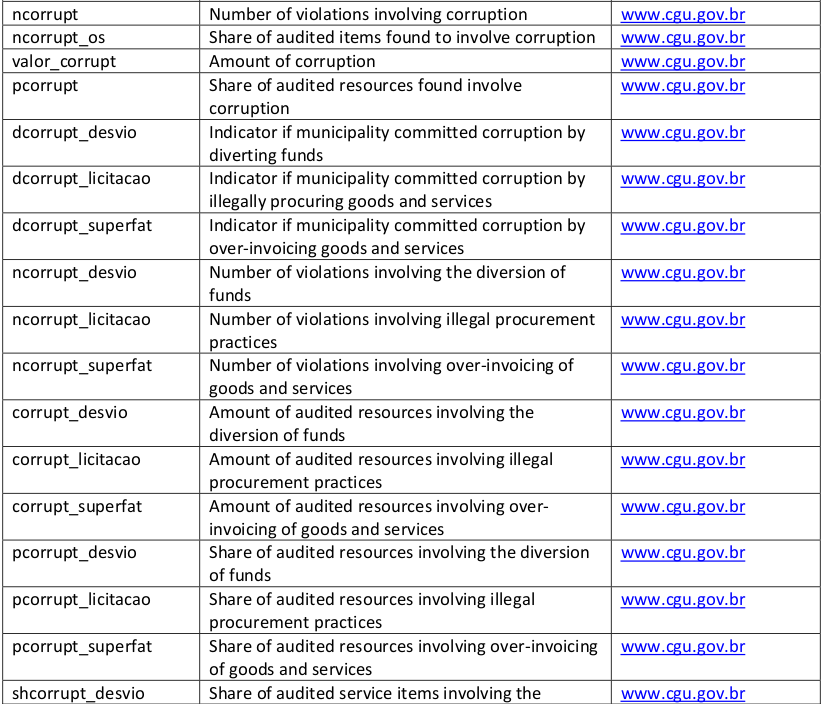

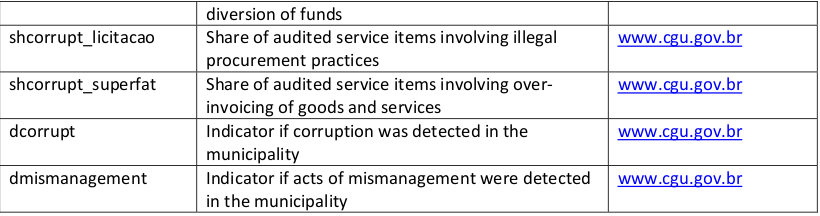

## Criando e visualizando o dataframe

In [243]:
#Instanciar o dataframe
#df=pd.read_csv("corruptiondata_aer.csv")

In [244]:
#Lista as primeiras 5 linhas do banco de dados
#pd.options.display.max_columns=500
print('Dimensões do dataset: ',df.shape)
df.head()

Dimensões do dataset:  (476, 116)


,uf,nsorteio,totrecursos,tot_os,pop,purb,p_secundario,cod_ibge6,pib_capita_02,op_01_04,reeleito,ENEP2000,ENLP2000,pref_idade_tse,comarca,reeleito_2004,p_cad_pref,rec_transf_correntes,gini_ipea,fiscalizacoes,valor_fiscalizado,winmargin2000,winmargin2000_inclost,incumbent,vereador9600,pmismanagement,elected1,first,lpib02,lpop,pref_masc,party_d1,party_d3,party_d4,party_d5,party_d6,party_d7,party_d8,party_d9,party_d10,party_d11,party_d12,party_d13,party_d14,party_d15,party_d16,party_d17,party_d18,pref_escola,sorteio1,sorteio2,sorteio3,sorteio4,sorteio5,sorteio6,sorteio7,sorteio8,sorteio9,sorteio10,media2,vereador_eleit,mun_novo,exp_prefeito,winmargin,samepartygov98,lrec_trans,lfunc_ativ,lrec_fisc,ncorrupt,valor_corrupt,pcorrupt,ncorrupt_os,dcorrupt_desvio,dcorrupt_licitacao,dcorrupt_superfat,dcorrupt,ncorrupt_desvio,ncorrupt_licitacao,ncorrupt_superfat,corrupt_desvio,corrupt_licitacao,corrupt_superfat,pcorrupt_desvio,pcorrupt_licitacao,pcorrupt_superfat,shcorrupt_desvio,shcorrupt_licitacao,shcorrupt_superfat,dmismanagement,uf_d1,uf_d2,uf_d3,uf_d4,uf_d5,uf_d6,uf_d7,uf_d8,uf_d9,uf_d10,uf_d11,uf_d12,uf_d13,uf_d14,uf_d15,uf_d16,uf_d17,uf_d18,uf_d19,uf_d20,uf_d21,uf_d22,uf_d23,uf_d24,uf_d25,uf_d26,esample2
0,RO,5,6913597.38,47.0,18207,0.815401,0.248250,566128,3548.0010,0,0,6.900685,5.400000,60,1,0,0.111111,8.688842e+06,0.600,47,6913597.38,0.030935,0.030935,1,0.0,0.928571,0,1,-1.036201,9.809562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,1,0,0,0,0,0,0,1,0.000675,0,0,0.030935,0,15.977551,6.167517,15.749001,3,672785.13,0.097313,0.063830,1,1,1,1,1,1,1,65085.102,530900.0,76800.0,0.009414,0.076791,0.011109,0.021277,0.021277,0.021277,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,RO,7,7135210.78,62.0,10459,0.198203,0.110925,566130,4203.4219,0,1,5.173238,4.263158,34,0,0,0.333333,4.871684e+06,0.564,62,7135210.78,0.172863,NaN,0,NaN,1.111111,0,0,-0.866686,9.255218,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0,1,0.001625,1,0,0.172863,0,15.398951,5.641907,15.780552,0,0.00,0.000000,0.000000,0,0,0,0,0,0,0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,RO,2,26821074.06,140.0,40884,0.649178,0.254702,566138,3904.2673,0,1,7.803850,7.258064,42,1,0,0.133333,1.747097e+07,0.600,140,26821074.06,0.310956,NaN,0,NaN,0.806452,0,0,-0.940515,10.618494,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,1,0.000562,0,0,0.310956,1,16.676052,6.872128,17.104698,1,0.00,0.000000,0.007143,1,0,0,1,1,0,0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.007143,0.000000,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,RO,4,14710780.70,89.0,47382,0.726457,0.267212,566151,4081.2578,0,1,6.499936,5.761904,41,1,0,0.272727,2.088945e+07,0.575,89,14710780.70,0.391912,NaN,0,NaN,0.191489,0,0,-0.896180,10.765998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,0,0,0,0,0,0,1,0.000383,0,0,0.391912,1,16.854755,6.979145,16.504091,0,0.00,0.000000,0.000000,0,0,0,0,0,0,0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,RO,3,4181534.83,NaN,23874,0.271257,0.134546,566155,2192.4736,1,1,5.946526,5.400000,47,0,0,0.222222,8.795000e+06,0.531,69,4181534.83,0.186155,NaN,0,NaN,NaN,0,0,-1.517555,10.080545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000945,1,0,0.186155,0,15.989694,6.118097,15.246189,0,0.00,0.000000,0.000000,0,0,0,0,0,0,0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Verificar dados faltantes

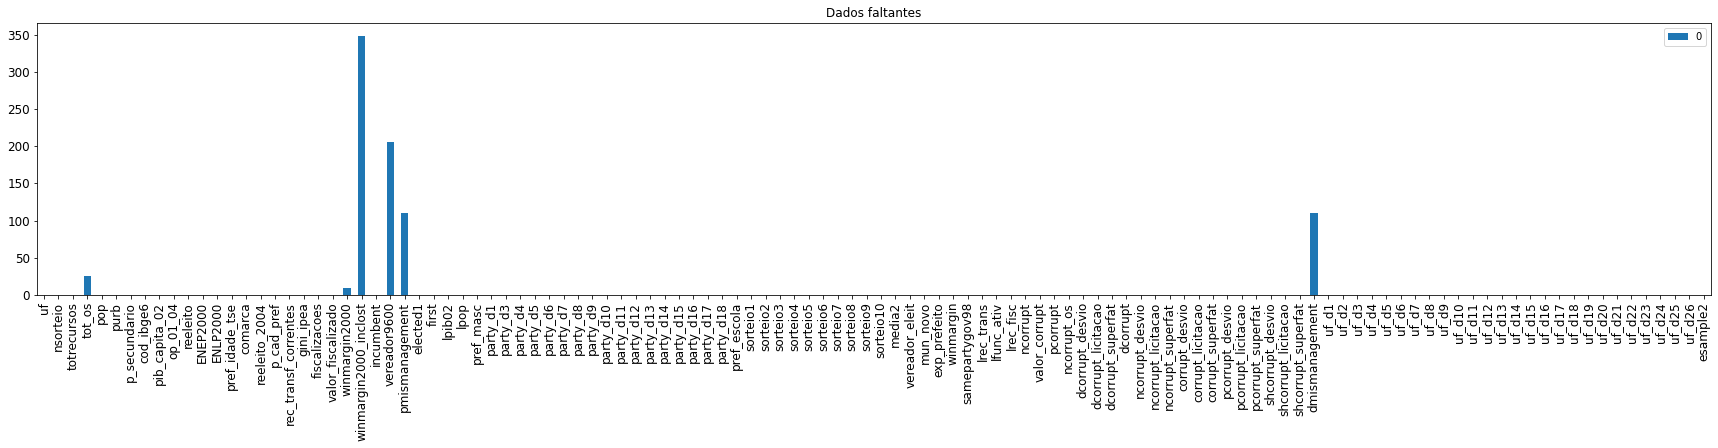

In [245]:
nulos=df.isnull().sum()
nulos=pd.DataFrame(nulos)
nulos.plot(kind='bar',title='Dados faltantes',fontsize=12,figsize=(30,5));

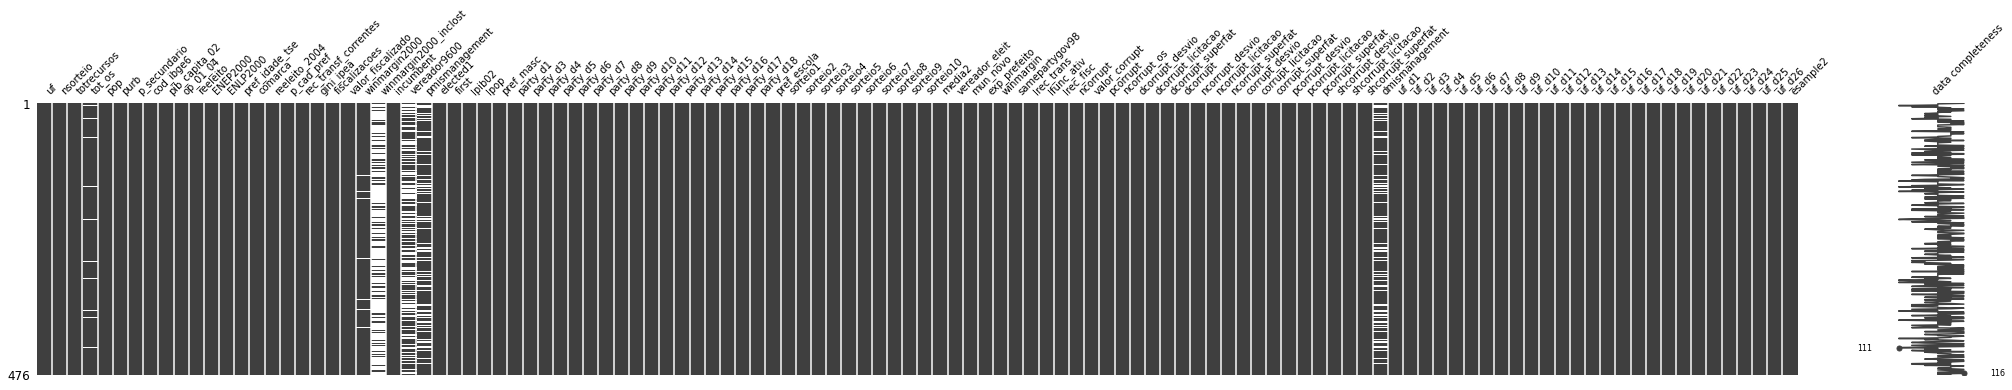

In [246]:
import missingno as msno
msno.matrix(df,labels=True,fontsize=10,figsize=(35,5));

## Excluir as colunas com dados faltantes, as colunas de variáveis dependentes que não serão utilizadas e outras que entende-se que não serão importantes

In [247]:
df_tratado = df.drop(columns=['nsorteio','cod_ibge6','tot_os','reeleito_2004','valor_fiscalizado','winmargin2000_inclost','incumbent','vereador9600','ncorrupt','pmismanagement','elected1','lpib02', 'lpop','sorteio1','sorteio2','sorteio3','sorteio4','sorteio5','sorteio6','sorteio7','sorteio8','sorteio9','sorteio10','winmargin2000','lrec_trans','lrec_fisc','esample2','tot_os','valor_corrupt','pcorrupt','ncorrupt_os', 'dcorrupt_desvio', 'dcorrupt_licitacao', 'dcorrupt_superfat', 'ncorrupt_desvio', 'ncorrupt_licitacao', 'ncorrupt_superfat', 'corrupt_desvio', 'corrupt_licitacao', 'corrupt_superfat', 'pcorrupt_desvio', 'pcorrupt_licitacao','dcorrupt' ,'pcorrupt_superfat', 'shcorrupt_desvio', 'shcorrupt_licitacao', 'shcorrupt_superfat', 'dmismanagement','uf_d1','uf_d2','uf_d3','uf_d4','uf_d5','uf_d6','uf_d7','uf_d8','uf_d9','uf_d10','uf_d11','uf_d12','uf_d13','uf_d14','uf_d15','uf_d16','uf_d17','uf_d18','uf_d19','uf_d20','uf_d21','uf_d22','uf_d23','uf_d24','uf_d25','uf_d26','esample2'])
df_tratado['dcorrupt']=df.dcorrupt
print('Novas dimensões do dataframe: ',df_tratado.shape)
df_tratado.head()

Novas dimensões do dataframe:  (476, 44)


,uf,totrecursos,pop,purb,p_secundario,pib_capita_02,op_01_04,reeleito,ENEP2000,ENLP2000,pref_idade_tse,comarca,p_cad_pref,rec_transf_correntes,gini_ipea,fiscalizacoes,first,pref_masc,party_d1,party_d3,party_d4,party_d5,party_d6,party_d7,party_d8,party_d9,party_d10,party_d11,party_d12,party_d13,party_d14,party_d15,party_d16,party_d17,party_d18,pref_escola,media2,vereador_eleit,mun_novo,exp_prefeito,winmargin,samepartygov98,lfunc_ativ,dcorrupt
0,RO,6913597.38,18207,0.815401,0.248250,3548.0010,0,0,6.900685,5.400000,60,1,0.111111,8.688842e+06,0.600,47,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,0.000675,0,0,0.030935,0,6.167517,1
1,RO,7135210.78,10459,0.198203,0.110925,4203.4219,0,1,5.173238,4.263158,34,0,0.333333,4.871684e+06,0.564,62,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0.001625,1,0,0.172863,0,5.641907,0
2,RO,26821074.06,40884,0.649178,0.254702,3904.2673,0,1,7.803850,7.258064,42,1,0.133333,1.747097e+07,0.600,140,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0.000562,0,0,0.310956,1,6.872128,1
3,RO,14710780.70,47382,0.726457,0.267212,4081.2578,0,1,6.499936,5.761904,41,1,0.272727,2.088945e+07,0.575,89,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0.000383,0,0,0.391912,1,6.979145,0
4,RO,4181534.83,23874,0.271257,0.134546,2192.4736,1,1,5.946526,5.400000,47,0,0.222222,8.795000e+06,0.531,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0.000945,1,0,0.186155,0,6.118097,0


## Incluindo a feature party_d2 que estava faltando

In [248]:
columns_party = df_tratado.columns[18:35]
sum=df_tratado[columns_party].value_counts
columns_party

Index(['party_d1', 'party_d3', 'party_d4', 'party_d5', 'party_d6', 'party_d7',
       'party_d8', 'party_d9', 'party_d10', 'party_d11', 'party_d12',
       'party_d13', 'party_d14', 'party_d15', 'party_d16', 'party_d17',
       'party_d18'],
      dtype='object')

In [249]:
#columns_party = df.columns[31:48]
sum=df_tratado[columns_party].sum(axis=1)
print(list(sum))
party_d2=(1-sum)**2
print(list(party_d2))
#Adicionar o party_d2 no dataframe
#df['party_d2']=party_d2
#df_tratado = df.drop(columns=['party_d2'])

[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 

In [250]:
df_tratado.head()

,uf,totrecursos,pop,purb,p_secundario,pib_capita_02,op_01_04,reeleito,ENEP2000,ENLP2000,pref_idade_tse,comarca,p_cad_pref,rec_transf_correntes,gini_ipea,fiscalizacoes,first,pref_masc,party_d1,party_d3,party_d4,party_d5,party_d6,party_d7,party_d8,party_d9,party_d10,party_d11,party_d12,party_d13,party_d14,party_d15,party_d16,party_d17,party_d18,pref_escola,media2,vereador_eleit,mun_novo,exp_prefeito,winmargin,samepartygov98,lfunc_ativ,dcorrupt
0,RO,6913597.38,18207,0.815401,0.248250,3548.0010,0,0,6.900685,5.400000,60,1,0.111111,8.688842e+06,0.600,47,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,0.000675,0,0,0.030935,0,6.167517,1
1,RO,7135210.78,10459,0.198203,0.110925,4203.4219,0,1,5.173238,4.263158,34,0,0.333333,4.871684e+06,0.564,62,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0.001625,1,0,0.172863,0,5.641907,0
2,RO,26821074.06,40884,0.649178,0.254702,3904.2673,0,1,7.803850,7.258064,42,1,0.133333,1.747097e+07,0.600,140,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0.000562,0,0,0.310956,1,6.872128,1
3,RO,14710780.70,47382,0.726457,0.267212,4081.2578,0,1,6.499936,5.761904,41,1,0.272727,2.088945e+07,0.575,89,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0.000383,0,0,0.391912,1,6.979145,0
4,RO,4181534.83,23874,0.271257,0.134546,2192.4736,1,1,5.946526,5.400000,47,0,0.222222,8.795000e+06,0.531,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0.000945,1,0,0.186155,0,6.118097,0


In [251]:
df_tratado.insert(loc=19, column='party_d2', value=party_d2)

In [252]:
df_tratado.head()

,uf,totrecursos,pop,purb,p_secundario,pib_capita_02,op_01_04,reeleito,ENEP2000,ENLP2000,pref_idade_tse,comarca,p_cad_pref,rec_transf_correntes,gini_ipea,fiscalizacoes,first,pref_masc,party_d1,party_d2,party_d3,party_d4,party_d5,party_d6,party_d7,party_d8,party_d9,party_d10,party_d11,party_d12,party_d13,party_d14,party_d15,party_d16,party_d17,party_d18,pref_escola,media2,vereador_eleit,mun_novo,exp_prefeito,winmargin,samepartygov98,lfunc_ativ,dcorrupt
0,RO,6913597.38,18207,0.815401,0.248250,3548.0010,0,0,6.900685,5.400000,60,1,0.111111,8.688842e+06,0.600,47,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,1,0.000675,0,0,0.030935,0,6.167517,1
1,RO,7135210.78,10459,0.198203,0.110925,4203.4219,0,1,5.173238,4.263158,34,0,0.333333,4.871684e+06,0.564,62,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0.001625,1,0,0.172863,0,5.641907,0
2,RO,26821074.06,40884,0.649178,0.254702,3904.2673,0,1,7.803850,7.258064,42,1,0.133333,1.747097e+07,0.600,140,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,0.000562,0,0,0.310956,1,6.872128,1
3,RO,14710780.70,47382,0.726457,0.267212,4081.2578,0,1,6.499936,5.761904,41,1,0.272727,2.088945e+07,0.575,89,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0.000383,0,0,0.391912,1,6.979145,0
4,RO,4181534.83,23874,0.271257,0.134546,2192.4736,1,1,5.946526,5.400000,47,0,0.222222,8.795000e+06,0.531,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0.000945,1,0,0.186155,0,6.118097,0


In [253]:
df_tratado.value_counts()

uf  totrecursos  pop     purb      p_secundario  pib_capita_02  op_01_04  reeleito  ENEP2000   ENLP2000   pref_idade_tse  comarca  p_cad_pref  rec_transf_correntes  gini_ipea  fiscalizacoes  first  pref_masc  party_d1  party_d2  party_d3  party_d4  party_d5  party_d6  party_d7  party_d8  party_d9  party_d10  party_d11  party_d12  party_d13  party_d14  party_d15  party_d16  party_d17  party_d18  pref_escola  media2  vereador_eleit  mun_novo  exp_prefeito  winmargin  samepartygov98  lfunc_ativ  dcorrupt
TO  95828918.42  113143  0.935754  0.408941      3640.9270      0         0         7.702031   4.828571   46              1        0.307692    3.553175e+07          0.619      80             1      0          0         1         0         0         0         0         0         0         0         0          0          0          0          0          0          0          0          0          6            1       0.000213        1         0             0.046457   1               7.85360

## Como ficou o dataset após o tratamento dos dados nulos

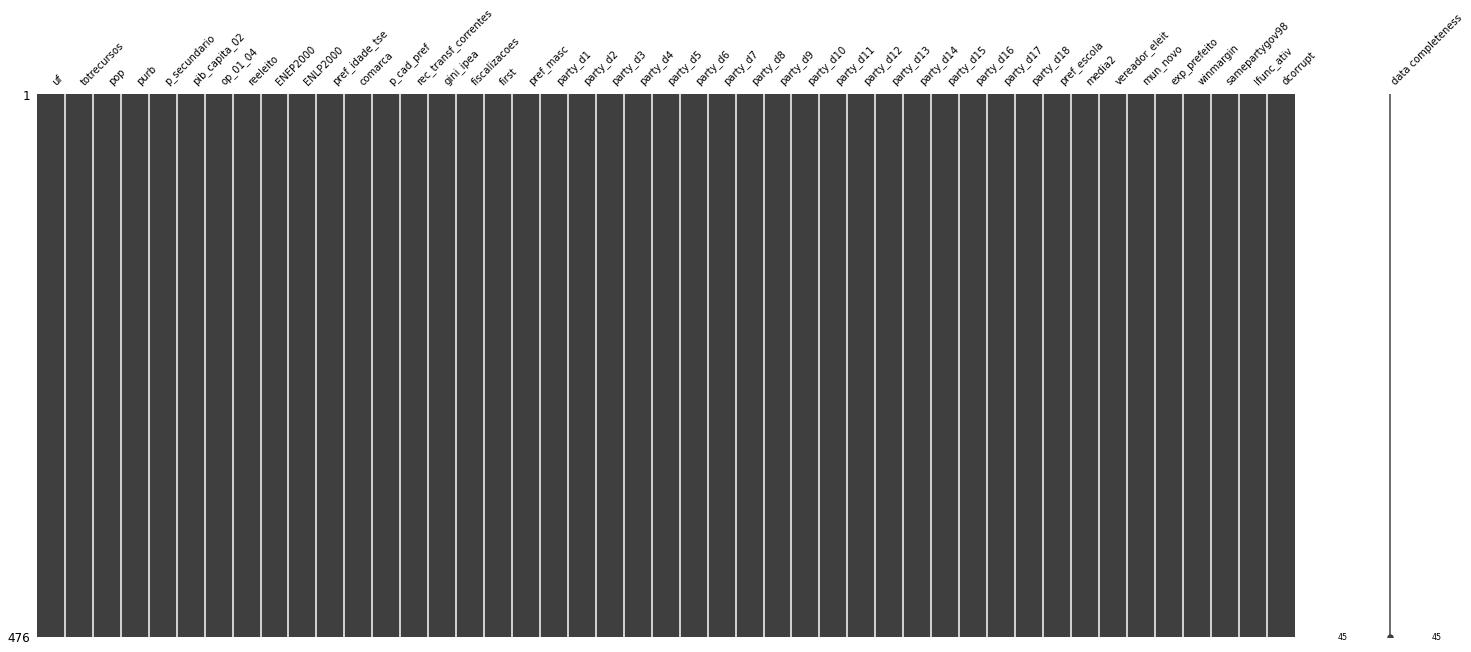

In [254]:
msno.matrix(df_tratado,labels=True,fontsize=10);

In [255]:
#Embaralhando o dataframe
df_tratado = df_tratado.sample(frac=1)
df_tratado.head()

,uf,totrecursos,pop,purb,p_secundario,pib_capita_02,op_01_04,reeleito,ENEP2000,ENLP2000,pref_idade_tse,comarca,p_cad_pref,rec_transf_correntes,gini_ipea,fiscalizacoes,first,pref_masc,party_d1,party_d2,party_d3,party_d4,party_d5,party_d6,party_d7,party_d8,party_d9,party_d10,party_d11,party_d12,party_d13,party_d14,party_d15,party_d16,party_d17,party_d18,pref_escola,media2,vereador_eleit,mun_novo,exp_prefeito,winmargin,samepartygov98,lfunc_ativ,dcorrupt
261,MG,2057265.32,7389,0.536608,0.229825,2728.56880,0,1,4.887826,3.240000,40,1,0.444444,3.691286e+06,0.497,31,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,0.001748,0,1,0.596922,0,4.828314,0
100,PI,2108986.87,5988,0.128758,0.044097,959.15887,0,0,3.135549,2.793103,51,0,0.222222,2.552187e+06,0.558,54,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0.001940,1,0,0.080393,0,5.075174,1
94,PI,1129079.07,4220,0.248815,0.074545,984.30505,0,1,3.247528,2.612903,48,0,0.555556,2.128426e+06,0.689,27,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0.003541,1,0,0.151357,1,5.030438,0
31,PA,1688876.80,5957,0.822058,0.230723,5536.55420,0,0,7.161484,5.400000,49,0,0.222222,3.922586e+06,0.607,76,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0.002481,1,1,0.176932,1,5.117994,0
391,SC,4086514.63,37707,0.865887,0.324204,7762.18990,0,1,3.092468,2.574468,36,1,0.545455,1.996795e+07,0.491,29,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0.000477,0,0,0.340219,0,6.787845,1


In [256]:
df_tratado.shape

(476, 45)

## Balanceamento da variável dependente (dcorrupt)

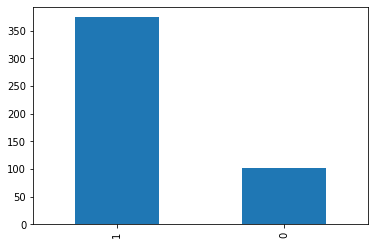

In [257]:
df_tratado.dcorrupt.value_counts().plot(kind='bar');

# **Pré-processamento dos dados**

## Enconding o dataframe
Obs: Ajustar o encoder usando todos os dados pode resultar em vazamento de dados (data leakage). Portanto, devemos ajustar o encoder usando somente os dados de treinamento. 

In [258]:
df_dummized = pd.get_dummies(df_tratado, prefix='uf')
df_dummized=df_dummized[[c for c in df_dummized if c not in ['dcorrupt']] + ['dcorrupt']]
print('Novas dimensões após o get_dummies na variável uf: ',df_dummized.shape)
df_dummized.head()

Novas dimensões após o get_dummies na variável uf:  (476, 70)


,totrecursos,pop,purb,p_secundario,pib_capita_02,op_01_04,reeleito,ENEP2000,ENLP2000,pref_idade_tse,comarca,p_cad_pref,rec_transf_correntes,gini_ipea,fiscalizacoes,first,pref_masc,party_d1,party_d2,party_d3,party_d4,party_d5,party_d6,party_d7,party_d8,party_d9,party_d10,party_d11,party_d12,party_d13,party_d14,party_d15,party_d16,party_d17,party_d18,pref_escola,media2,vereador_eleit,mun_novo,exp_prefeito,winmargin,samepartygov98,lfunc_ativ,uf_AC,uf_AL,uf_AM,uf_AP,uf_BA,uf_CE,uf_ES,uf_GO,uf_MA,uf_MG,uf_MS,uf_MT,uf_PA,uf_PB,uf_PE,uf_PI,uf_PR,uf_RJ,uf_RN,uf_RO,uf_RR,uf_RS,uf_SC,uf_SE,uf_SP,uf_TO,dcorrupt
261,2057265.32,7389,0.536608,0.229825,2728.56880,0,1,4.887826,3.240000,40,1,0.444444,3.691286e+06,0.497,31,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,0.001748,0,1,0.596922,0,4.828314,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,2108986.87,5988,0.128758,0.044097,959.15887,0,0,3.135549,2.793103,51,0,0.222222,2.552187e+06,0.558,54,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0.001940,1,0,0.080393,0,5.075174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
94,1129079.07,4220,0.248815,0.074545,984.30505,0,1,3.247528,2.612903,48,0,0.555556,2.128426e+06,0.689,27,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0.003541,1,0,0.151357,1,5.030438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
31,1688876.80,5957,0.822058,0.230723,5536.55420,0,0,7.161484,5.400000,49,0,0.222222,3.922586e+06,0.607,76,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0.002481,1,1,0.176932,1,5.117994,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
391,4086514.63,37707,0.865887,0.324204,7762.18990,0,1,3.092468,2.574468,36,1,0.545455,1.996795e+07,0.491,29,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0.000477,0,0,0.340219,0,6.787845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


## Instanciar X e y

In [259]:
# Atribuir variáveis independentes para X
X = df_dummized.drop(columns=['dcorrupt'])
# Atribuir variável dependente para y
y = df_dummized['dcorrupt']

## Separar os dados de treino e teste

In [260]:
#Separar os dados de treino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

# Balanceando a target com o Over Sampling

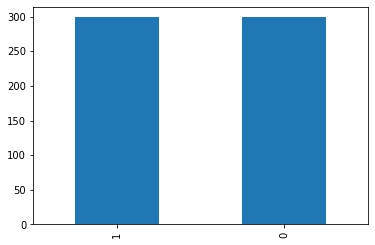

In [261]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter 
over = RandomOverSampler(random_state=0)
X_resampled, y_resampled = over.fit_resample(X_train, y_train)

# Mostrar as dimensões de X e y print('Dimensões de X_resampled = ', X_resampled.shape) print('Dimensões de y_resampled = ', y_resampled.shape) 
y_resampled.value_counts().plot(kind='bar'); 


# Usando o GridSearch Bayesiano para definir os melhores parâmetros para o **Random Forest**

In [262]:
!pip3 install scikit-optimize

In [263]:
'''from sklearn.ensemble import RandomForestClassifier

# define modelos and parâmetros
#model = RandomForestClassifier()
n_estimators = [120,300,500,800,1200]
max_depth = [3,5,8,15]
min_samples_split = [2,5,10,15]
min_samples_leaf = [1,2,5]
max_features = ['log2','sqrt',None]
'''

"from sklearn.ensemble import RandomForestClassifier\n\n# define modelos and parâmetros\n#model = RandomForestClassifier()\nn_estimators = [120,300,500,800,1200]\nmax_depth = [3,5,8,15]\nmin_samples_split = [2,5,10,15]\nmin_samples_leaf = [1,2,5]\nmax_features = ['log2','sqrt',None]\n"

In [264]:
# define a grade de parâmetros
'''grid = dict(randomforestclassifier__n_estimators = n_estimators, randomforestclassifier__max_depth = max_depth,
            randomforestclassifier__min_samples_split=min_samples_split,randomforestclassifier__min_samples_leaf=min_samples_leaf,
            randomforestclassifier__max_features=max_features)
grid
'''

'grid = dict(randomforestclassifier__n_estimators = n_estimators, randomforestclassifier__max_depth = max_depth,\n            randomforestclassifier__min_samples_split=min_samples_split,randomforestclassifier__min_samples_leaf=min_samples_leaf,\n            randomforestclassifier__max_features=max_features)\ngrid\n'

In [265]:
# Contruindo o Pipeline
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0,class_weight='balanced'))  
'''

"from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\npipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0,class_weight='balanced'))  \n"

In [266]:
# Aplicando o Grid Search Baysean
'''from skopt import BayesSearchCV 
opt = BayesSearchCV(pipe,grid,n_iter=32,random_state=0)

# executes bayesian optimization
grid_result = opt.fit(X_resampled,y_resampled)

# model can be saved, used for predictions or scoring
print(opt.score(X_test,y_test))
'''

'from skopt import BayesSearchCV \nopt = BayesSearchCV(pipe,grid,n_iter=32,random_state=0)\n\n# executes bayesian optimization\ngrid_result = opt.fit(X_resampled,y_resampled)\n\n# model can be saved, used for predictions or scoring\nprint(opt.score(X_test,y_test))\n'

In [267]:
#grid_result.best_params_

# Usando o GridSearch Bayesiano para definir os melhores parâmetros para o **XGBoost**

In [268]:
'''from xgboost import XGBClassifier

# define modelos and parâmetros

eta = [0.01,0.015,0.025,0.05,0.1]
gamma = [0.05,0.1,0.3,0.5,0.7,0.9,1.0]
max_depth = [3,5,7,9,12,15,17,25]
min_child_weight = [1,3,5,7]
subsample = [0.6,0.7,0.8,0.9,1.0]
colsample_bytree = [0.6,0.7,0.8,0.9,1.0]
reg_lambda = [0.01,0.1,1.0]
reg_alpha = [0,0.1,0.5,1.0]
'''

'from xgboost import XGBClassifier\n\n# define modelos and parâmetros\n\neta = [0.01,0.015,0.025,0.05,0.1]\ngamma = [0.05,0.1,0.3,0.5,0.7,0.9,1.0]\nmax_depth = [3,5,7,9,12,15,17,25]\nmin_child_weight = [1,3,5,7]\nsubsample = [0.6,0.7,0.8,0.9,1.0]\ncolsample_bytree = [0.6,0.7,0.8,0.9,1.0]\nreg_lambda = [0.01,0.1,1.0]\nreg_alpha = [0,0.1,0.5,1.0]\n'

In [269]:
# define a grade de parâmetros
'''grid = dict(xgbclassifier__eta = eta, xgbclassifier__gamma = gamma, xgbclassifier__max_depth = max_depth,
            xgbclassifier__min_child_weight = min_child_weight, xgbclassifier__subsample = subsample,
            xgbclassifier__colsample_bytree = colsample_bytree, xgbclassifier__lambda = reg_lambda,
            xgbclassifier__alpha = reg_alpha)
grid
'''

'grid = dict(xgbclassifier__eta = eta, xgbclassifier__gamma = gamma, xgbclassifier__max_depth = max_depth,\n            xgbclassifier__min_child_weight = min_child_weight, xgbclassifier__subsample = subsample,\n            xgbclassifier__colsample_bytree = colsample_bytree, xgbclassifier__lambda = reg_lambda,\n            xgbclassifier__alpha = reg_alpha)\ngrid\n'

In [270]:
# Contruindo o Pipeline
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_xgb = make_pipeline(StandardScaler(), XGBClassifier(random_state=0,class_weight='balanced'))  
'''

"from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\npipe_xgb = make_pipeline(StandardScaler(), XGBClassifier(random_state=0,class_weight='balanced'))  \n"

In [271]:
# Aplicando o Grid Search Baysean
'''from skopt import BayesSearchCV 
opt = BayesSearchCV(pipe_xgb,grid,n_iter=32,random_state=0)

# executes bayesian optimization
grid_result = opt.fit(X_resampled,y_resampled)

# model can be saved, used for predictions or scoring
print(opt.score(X_test,y_test))
'''

'from skopt import BayesSearchCV \nopt = BayesSearchCV(pipe_xgb,grid,n_iter=32,random_state=0)\n\n# executes bayesian optimization\ngrid_result = opt.fit(X_resampled,y_resampled)\n\n# model can be saved, used for predictions or scoring\nprint(opt.score(X_test,y_test))\n'

In [272]:
#grid_result.best_params_

# Usando o GridSearch Bayesiano para definir os melhores parâmetros para o **SGDClassifier**

In [273]:
'''from sklearn.linear_model import SGDClassifier

# define modelos and parâmetros

average = [True,False]
l1_ratio = [0,1]
alpha = [0.0001,1.0]
'''

'from sklearn.linear_model import SGDClassifier\n\n# define modelos and parâmetros\n\naverage = [True,False]\nl1_ratio = [0,1]\nalpha = [0.0001,1.0]\n'

In [274]:
# define a grade de parâmetros
'''grid = dict(sgdclassifier__average = average, sgdclassifier__l1_ratio = l1_ratio, sgdclassifier__alpha = alpha)
grid
'''

'grid = dict(sgdclassifier__average = average, sgdclassifier__l1_ratio = l1_ratio, sgdclassifier__alpha = alpha)\ngrid\n'

In [275]:
# Contruindo o Pipeline
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_SGD = make_pipeline(StandardScaler(), SGDClassifier(random_state=0,class_weight='balanced'))  
'''

"from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\npipe_SGD = make_pipeline(StandardScaler(), SGDClassifier(random_state=0,class_weight='balanced'))  \n"

In [276]:
# Aplicando o Grid Search Baysean
'''from skopt import BayesSearchCV 
opt = BayesSearchCV(pipe_SGD,grid,n_iter=32,random_state=0)

# executes bayesian optimization
grid_result = opt.fit(X_resampled,y_resampled)

# model can be saved, used for predictions or scoring
print(opt.score(X_test,y_test))
'''

'from skopt import BayesSearchCV \nopt = BayesSearchCV(pipe_SGD,grid,n_iter=32,random_state=0)\n\n# executes bayesian optimization\ngrid_result = opt.fit(X_resampled,y_resampled)\n\n# model can be saved, used for predictions or scoring\nprint(opt.score(X_test,y_test))\n'

In [277]:
#grid_result.best_params_

# Usando o GridSearch Bayesiano para definir os melhores parâmetros para o **LinearSVC**

In [278]:
#from sklearn.svm import LinearSVC
'''from sklearn import svm

# define modelos and parâmetros
C = [0.001,0.01,0.1,1,10,100,1000]
gamma = ['auto']
class_weigth = ['balanced',None]
'''

"from sklearn import svm\n\n# define modelos and parâmetros\nC = [0.001,0.01,0.1,1,10,100,1000]\ngamma = ['auto']\nclass_weigth = ['balanced',None]\n"

In [279]:
# define a grade de parâmetros
'''grid = dict(svc__C = C, svc__gamma = gamma, svc__class_weight = class_weigth)
grid
'''

'grid = dict(svc__C = C, svc__gamma = gamma, svc__class_weight = class_weigth)\ngrid\n'

In [280]:
# Contruindo o Pipeline
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_svm = make_pipeline(StandardScaler(), svm.SVC())  
'''

'from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\npipe_svm = make_pipeline(StandardScaler(), svm.SVC())  \n'

In [281]:
# Aplicando o Grid Search Baysean
'''from skopt import BayesSearchCV 
opt = BayesSearchCV(pipe_svm,grid,n_iter=32,random_state=0)

# executes bayesian optimization
grid_result = opt.fit(X_resampled,y_resampled)

# model can be saved, used for predictions or scoring
print(opt.score(X_test,y_test))
'''

'from skopt import BayesSearchCV \nopt = BayesSearchCV(pipe_svm,grid,n_iter=32,random_state=0)\n\n# executes bayesian optimization\ngrid_result = opt.fit(X_resampled,y_resampled)\n\n# model can be saved, used for predictions or scoring\nprint(opt.score(X_test,y_test))\n'

In [282]:
#pipe_svm.get_params().keys()

In [283]:
#grid_result.best_params_

# Usando o GridSearch Bayesiano para definir os melhores parâmetros para o **LogisticRegression**

In [284]:
'''from sklearn.linear_model import LogisticRegression

# define modelos and parâmetros
penalty = ['l2','none']
C = [0.001,0.01,0.1,1,10,100]
'''

"from sklearn.linear_model import LogisticRegression\n\n# define modelos and parâmetros\npenalty = ['l2','none']\nC = [0.001,0.01,0.1,1,10,100]\n"

In [285]:
# define a grade de parâmetros
'''grid = dict(logisticregression__penalty = penalty, logisticregression__C = C)
grid
'''

'grid = dict(logisticregression__penalty = penalty, logisticregression__C = C)\ngrid\n'

In [286]:
# Contruindo o Pipeline
'''from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_LR = make_pipeline(StandardScaler(), LogisticRegression())  
'''

'from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\npipe_LR = make_pipeline(StandardScaler(), LogisticRegression())  \n'

In [287]:
# Aplicando o Grid Search Baysean
'''from skopt import BayesSearchCV 
opt = BayesSearchCV(pipe_LR,grid,n_iter=32,random_state=0)

# executes bayesian optimization
grid_result = opt.fit(X_resampled,y_resampled)

# model can be saved, used for predictions or scoring
print(opt.score(X_test,y_test))
'''

'from skopt import BayesSearchCV \nopt = BayesSearchCV(pipe_LR,grid,n_iter=32,random_state=0)\n\n# executes bayesian optimization\ngrid_result = opt.fit(X_resampled,y_resampled)\n\n# model can be saved, used for predictions or scoring\nprint(opt.score(X_test,y_test))\n'

In [288]:
#grid_result.best_params_

# Usando Ensemble com os melhores parâmetros dados pelo GridSearch Bayesiano (maximizando recall and precision)

In [289]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#sgd = SGDClassifier(alpha=0.031189498906737733, average=True, l1_ratio=1,random_state=0)
bnli = BernoulliNB(alpha = 0.0, binarize = 0, fit_prior = True, class_prior = None)
#svm = svm.SVC(C=10, gamma='auto', class_weight=None,random_state=0)
gnb = GaussianNB()
#gnb = GaussianNB(var_smoothing=1.873817422860383e-08)
#{'gaussiannb__var_smoothing': 1.873817422860383e-08}
log_reg = LogisticRegression(max_iter=3000, solver='lbfgs', C=0.1, penalty='l2',random_state=0)
#{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}
#tree = DecisionTreeClassifier(max_depth=6,random_state=0)
rf = RandomForestClassifier(n_estimators=500, max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='log2',random_state=0)
# {'randomforestclassifier__max_depth': 15,
#  'randomforestclassifier__max_features': 'log2',
#  'randomforestclassifier__min_samples_leaf': 1,
#  'randomforestclassifier__min_samples_split': 2,
#  'randomforestclassifier__n_estimators': 500}
xgb = XGBClassifier(eta=0.015,gamma=0.1, max_depth= 12,min_child_weight=1,subsample=0.9,colsample_bytree=0.6,reg_lambda=0.1,reg_alpha=0.0,random_state=0)
#xgb = XGBClassifier(eta=0.025,gamma=0.1, max_depth= 17,min_child_weight=3,subsample=0.9,colsample_bytree=0.9,reg_lambda=0.01,reg_alpha=1.0,random_state=0)
# OrderedDict([('xgbclassifier__alpha', 1.0),ok
#              ('xgbclassifier__colsample_bytree', 0.9),ok
#              ('xgbclassifier__eta', 0.025),ok
#              ('xgbclassifier__gamma', 0.1),ok
#              ('xgbclassifier__lambda', 0.01),ok
#              ('xgbclassifier__max_depth', 17),ok
#              ('xgbclassifier__min_child_weight', 3),ok
#              ('xgbclassifier__subsample', 0.9)])ok
estimators = [
#              ('rf', rf), ('tree', tree),
              ('rf', make_pipeline(StandardScaler(),rf)),
#              ('tree', make_pipeline(StandardScaler(),tree)),
#              ('sgd', make_pipeline(StandardScaler(),sgd)),
              ('bnli', make_pipeline(StandardScaler(),bnli)),
#              ('svm', make_pipeline(StandardScaler(),svm)),
              ('gnb', make_pipeline(StandardScaler(),gnb)),
              ('log_reg', make_pipeline(StandardScaler(),log_reg)),
              ('xgb', make_pipeline(StandardScaler(),xgb))
              ]


In [290]:
rf.fit(X_resampled,y_resampled)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=500,
                       random_state=0)

In [291]:
#tree.fit(X_resampled,y_resampled)

In [292]:
bnli.fit(X_resampled,y_resampled)

alpha too small will result in numeric errors, setting alpha = 1.0e-10


BernoulliNB(alpha=0.0, binarize=0)

In [293]:
gnb.fit(X_resampled,y_resampled)

GaussianNB()

In [294]:
log_reg.fit(X_resampled,y_resampled)

LogisticRegression(C=0.1, max_iter=3000, random_state=0)

In [295]:
xgb.fit(X_resampled,y_resampled)

XGBClassifier(colsample_bytree=0.6, eta=0.015, gamma=0.1, max_depth=12,
              reg_alpha=0.0, reg_lambda=0.1, subsample=0.9)

In [296]:
#xgb.predict_proba(X_test)

In [297]:
#vot.predict_proba(X_test )

In [298]:
#v=vot.predict_proba(X_test)
#v[:,1]

In [299]:
df_teste = pd.DataFrame(y_test,columns=['ytrue'])
df_teste['ytrue']=y_test
df_teste['yvot']=vot.predict(X_test)
df_teste['yrf']=rf.predict(X_test)
df_teste['ybnli']=bnli.predict(X_test)
df_teste['ygnb']=gnb.predict(X_test)
df_teste['ylog_reg']=log_reg.predict(X_test)
df_teste['yxgb']=xgb.predict(X_test)
df_teste
  # ('rf', make_pipeline(StandardScaler(),rf)),
  #             ('tree', make_pipeline(StandardScaler(),tree)),
  #             ('bnli', make_pipeline(StandardScaler(),bnli)),
  #             ('gnb', make_pipeline(StandardScaler(),gnb)),
  #             ('log_reg', make_pipeline(StandardScaler(),log_reg)),
  #             ('xgb', make_pipeline(StandardScaler(),xgb))
             


,ytrue,yvot,yrf,ybnli,ygnb,ylog_reg,yxgb
118,1,1,1,1,1,1,1
332,0,0,0,0,0,0,1
268,0,0,1,1,0,0,1
183,1,1,1,1,0,1,1
227,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...
405,0,0,0,0,1,0,1
46,1,0,1,1,1,1,1
475,0,0,1,0,1,0,1
320,1,0,1,0,1,0,1


In [300]:
df_teste[(df_teste['ytrue'] ==0) & (df_teste['yvot']==1)]

,ytrue,yvot,yrf,ybnli,ygnb,ylog_reg,yxgb
59,0,1,1,1,1,1,1
418,0,1,1,0,0,0,1
24,0,1,1,0,1,1,1
247,0,1,1,1,0,0,1
107,0,1,1,1,0,1,1


In [301]:
df_teste[df_teste['yxgb'] ==0]

,ytrue,yvot,yrf,ybnli,ygnb,ylog_reg,yxgb
52,1,1,1,1,1,0,0
387,1,1,1,1,0,0,0
473,1,1,0,0,1,0,0
167,1,1,0,0,1,0,0
342,1,0,0,0,1,1,0
302,0,0,0,0,0,0,0
435,1,1,0,1,1,1,0
304,1,1,0,0,0,1,0
333,0,0,0,0,0,0,0
326,0,0,1,0,0,0,0


### Métricas do Ensemble

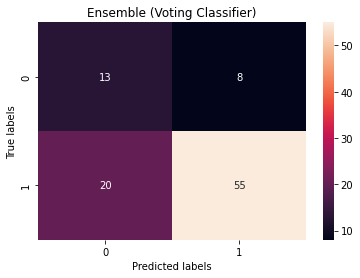

In [304]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate

vot = VotingClassifier(
    estimators=estimators, n_jobs=-1, verbose=True, voting='soft',weights=[1,1,1,1,1]
    )

vot.fit(X_resampled,y_resampled)

# Matriz de confusão para o Stacking com o Logistic Regression como final estimator
cm = confusion_matrix(y_test, vot.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Ensemble (Voting Classifier)')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show();


In [305]:
printMetrics(vot,X,y,cv=10)

,Métrica,Valor
0,roc_auc,0.663523
1,balanced_accuracy,0.574435
2,average_precision,0.877583
3,recall,0.874324
4,accuracy,0.746011
5,f1_macro,0.579324
6,f1_weighted,0.730408


# Entendendo o modelo através do SHAP

In [211]:
%%capture
!pip install shap

In [212]:
import shap

In [ ]:
parar

In [213]:
%%capture
# criando um explainer
explainer = shap.KernelExplainer(vot.predict,X_test)

# Definindo os shap values pelo explainer
shap_values = explainer.shap_values(X_test)
# Definindo um objeto explainer para uso com alguns gráficos
# shap_exp = explainer(X_test)
# Valor esperado / base / de referência = o valor que seria previsto se não soubéssemos quaisquer características da saída atual ”
print('Valor base:', explainer.expected_value)

pd.DataFrame(shap_values).head()

In [214]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test.iloc[0,:])

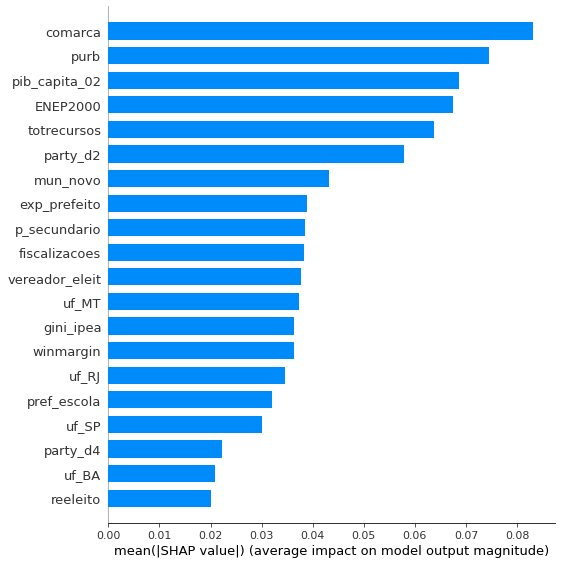

In [215]:
shap.initjs()
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")

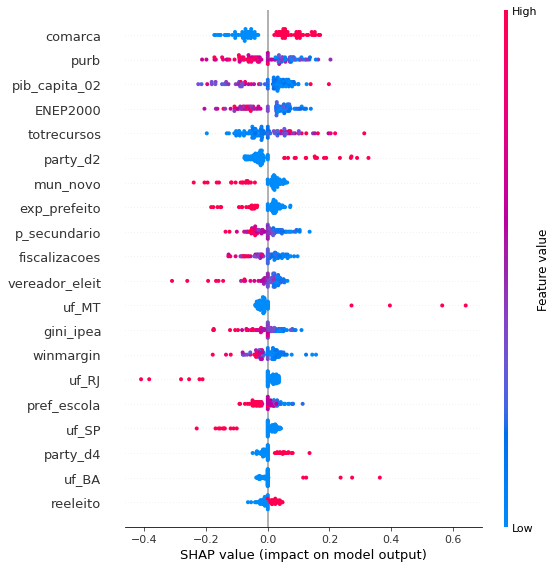

In [216]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

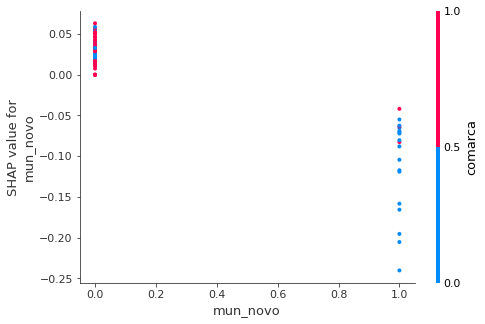

In [217]:
# shap.initjs()
# shap.dependence_plot(ind='mun_novo', interaction_index='comarca',
#                      shap_values=shap_values, 
#                      features=X_test)

In [236]:
import numpy as np 
from sklearn.model_selection import RepeatedStratifiedKFold 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import balanced_accuracy_score,f1_score,accuracy_score

ba = [] 
f1 = [] 
acc = [] 
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42) 

for train_index, test_index in rskf.split(X, y): 
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
  ros = RandomOverSampler() 
  X_resampled, y_resampled = ros.fit_resample(X_train, y_train) 
  model_resampled = vot 
  model_resampled.fit(X_resampled, y_resampled) 
  
  ba.append(balanced_accuracy_score(y_test, model_resampled.predict(X_test))) 
  f1.append(f1_score(y_test, model_resampled.predict(X_test))) 
  acc.append(accuracy_score(y_test, model_resampled.predict(X_test))) 





In [237]:
print('ba=',ba)
print('f1=',f1)
print('acc=',acc)

ba= [0.6295238095238096, 0.515, 0.6616666666666666, 0.6666666666666666, 0.48391248391248387]
f1= [0.732824427480916, 0.7338129496402876, 0.8169014084507041, 0.7971014492753622, 0.75]
acc= [0.6354166666666666, 0.6105263157894737, 0.7263157894736842, 0.7052631578947368, 0.6210526315789474]


In [239]:
print('ba_mean=',ba.mean)
print('f1_mean=',f1.mean)
print('acc_mean',acc.mean)

AttributeError: ignored

# Análise do desempenho da seleção dos municípios por sorteio

In [307]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_resampled,y_resampled)

DummyClassifier(strategy='uniform')

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


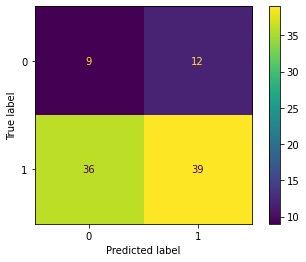

In [308]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dummy_clf, X_test, y_test, values_format='d');


In [309]:
printMetrics(dummy_clf,X,y,cv=10)

,Métrica,Valor
0,roc_auc,0.500000
1,balanced_accuracy,0.528899
2,average_precision,0.785727
3,recall,0.489616
4,accuracy,0.506516
5,f1_macro,0.468815
6,f1_weighted,0.547610


# AutoML

In [ ]:
!pip3 install auto-sklearn

In [ ]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier(scoring='precision')
cls.fit(X_resampled,y_resampled)

TypeError: ignored

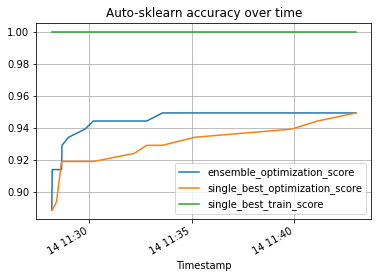

"[(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'fast_ica', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.029685816834945592, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 2, 'classifier:random_forest:min_samples_split': 4, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor

In [ ]:
import matplotlib.pyplot as plt
cls.cv_results_
cls.performance_over_time_.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)
plt.show()

cls.sprint_statistics()
cls.show_models()


In [ ]:
#metrics = ['roc_auc','balanced_accuracy', 'average_precision', 'recall', 'accuracy', 'f1_macro','f1_weighted']
print(cls.sprint_statistics())


auto-sklearn results:
  Dataset name: e63c58de-5cd0-11ec-810c-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.949495
  Number of target algorithm runs: 528
  Number of successful target algorithm runs: 467
  Number of crashed target algorithm runs: 41
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 19



In [ ]:
results_pd=pd.DataFrame.from_dict(cls.cv_results_)
print(results_pd.columns[0:80])
results_pd.sort(bý=rank_test_scores)

Index(['mean_test_score', 'mean_fit_time', 'params', 'rank_test_scores',
       'status', 'budgets', 'param_balancing:strategy',
       'param_classifier:__choice__', 'param_data_preprocessor:__choice__',
       'param_feature_preprocessor:__choice__',
       'param_classifier:adaboost:algorithm',
       'param_classifier:adaboost:learning_rate',
       'param_classifier:adaboost:max_depth',
       'param_classifier:adaboost:n_estimators',
       'param_classifier:bernoulli_nb:alpha',
       'param_classifier:bernoulli_nb:fit_prior',
       'param_classifier:decision_tree:criterion',
       'param_classifier:decision_tree:max_depth_factor',
       'param_classifier:decision_tree:max_features',
       'param_classifier:decision_tree:max_leaf_nodes',
       'param_classifier:decision_tree:min_impurity_decrease',
       'param_classifier:decision_tree:min_samples_leaf',
       'param_classifier:decision_tree:min_samples_split',
       'param_classifier:decision_tree:min_weight_fraction_le

AttributeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
predictions = cls.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, predictions))


Accuracy score: 0.78125


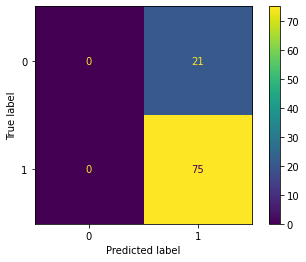

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#cm = plot_confusion_matrix(cls, X_test, y_test, values_format='d');
#cm = plot_confusion_matrix(X_test, cls.predict(y_test));
#plot_confusion_matrix(cls, X_test, y_test, values_format='d',title='AutoMl',);
from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cls, X_test, y_test, values_format='d');


#ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test)

# ax= plt.subplot()
# sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells


# # # Matriz de confusão para o Stacking com o Logistic Regression como final estimator
# # cm = confusion_matrix(y_test, vot.predict(X_test))
# # ax= plt.subplot()
# # sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Ensemble (Voting Classifier)')
# ax.xaxis.set_ticklabels(['baixo', 'alto'])
# ax.yaxis.set_ticklabels(['alto', 'baixo'])
# plt.show();



In [ ]:
printMetrics(cls,X,y)

Process ForkProcess-1267:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autosklearn/util/logging_.py", line 320, in start_log_server
    receiver.serve_until_stopped()
  File "/usr/local/lib/python3.7/dist-packages/autosklearn/util/logging_.py", line 352, in serve_until_stopped
    self.timeout)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
#print(cls.show_models()[0:3000])
print(cls.show_models())

[(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'fast_ica', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.029685816834945592, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 2, 'classifier:random_forest:min_samples_split': 4, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:

In [ ]:
print(cls.leaderboard())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
164          1             0.04  random_forest  0.050505  4.831715
424          2             0.02  random_forest  0.050505  2.044606
401          3             0.02  random_forest  0.050505  2.561671
399          4             0.04  random_forest  0.050505  2.476404
384          5             0.04  random_forest  0.050505  1.924172
363          6             0.04  random_forest  0.050505  2.502513
348          7             0.02  random_forest  0.050505  2.180351
341          8             0.04  random_forest  0.050505  2.330120
335          9             0.02  random_forest  0.050505  2.294253
333         10             0.02  random_forest  0.050505  2.163472
322         11             0.02  random_forest  0.050505  2.436287
321         12             0.02  random_forest  0.050505  2.351005
320         13             0.04  random_forest  0.050505  2.54